In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
import math

In [99]:
from google.colab import files

uploaded = files.upload()

Saving data_amostra_2.csv to data_amostra_2 (1).csv


In [100]:
df = pd.read_csv('data_amostra_2.csv')

tamanho_amostra = len(df)
df["qtde_quartos"], df["qtde_banheiros"], df["qtde_vagas"] = df["qtde_quartos"].astype(int), df["qtde_banheiros"].astype(int), df["qtde_vagas"].astype(int)

#**Dataframes separados**

In [101]:
df_apartamentos = df[df["categoria"] == "Apartamentos"]
df_casas = df[df["categoria"] == "Casas"]

Geral, sem distinção entre casas e apartamentos:

In [102]:
df_norte = df[df["zona"] == "Norte"]
df_sul = df[df["zona"] == "Sul"]
df_leste = df[df["zona"] == "Leste"]
df_oeste = df[df["zona"] == "Oeste"]
df_co = df[df["zona"] == "Centro-Oeste"]
df_cs = df[df["zona"] == "Centro-Sul"]

Casas:

In [103]:
df_casas_norte = df_norte.loc[df["categoria"] == "Casas"]
df_casas_sul = df_sul.loc[df_sul["categoria"] == "Casas"]
df_casas_leste = df_leste.loc[df_leste["categoria"] == "Casas"]
df_casas_oeste = df_oeste.loc[df_oeste["categoria"] == "Casas"]
df_casas_co = df_co.loc[df_co["categoria"] == "Casas"]
df_casas_cs = df_cs.loc[df_cs["categoria"] == "Casas"]

Apartamentos:

In [104]:
df_apartamentos_norte= df_norte.loc[df["categoria"] == "Apartamentos"]
df_apartamentos_sul = df_sul.loc[df_sul["categoria"] == "Apartamentos"]
df_apartamentos_leste = df_leste.loc[df["categoria"] == "Apartamentos"]
df_apartamentos_oeste = df_oeste.loc[df_oeste["categoria"] == "Apartamentos"]
df_apartamentos_co = df_co.loc[df_co["categoria"] == "Apartamentos"]
df_apartamentos_cs = df_cs.loc[df_cs["categoria"] == "Apartamentos"]

# ✣ Simetria

In [105]:
del df["Unnamed: 0.1"]
del df["Unnamed: 0"]

In [106]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


valor             2.835843
area              5.035663
qtde_quartos      0.446054
qtde_vagas        0.490403
qtde_banheiros    0.366733
dtype: float64

* As variáveis apresentam distribuição assimétrica positiva ($Mo < Md < \overline{X}$), pois os valores resultantes são maiores que zero. 

* As variáveis quantidade de quartos, quantidade de vagas e quantidade de banheiros são mais normalmente distribuídas pois seus valores são próximos a zero.


Podemos comprovar com a plotagem dos boxplots abaixo: 

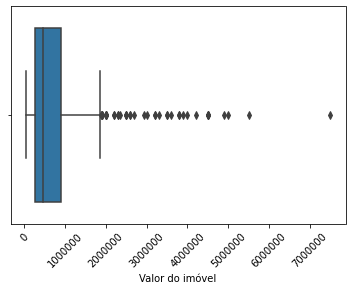

In [107]:
ax = sns.boxplot(x=df["valor"])
ax.set(xlabel='Valor do imóvel')

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation = 45)

plt.show()

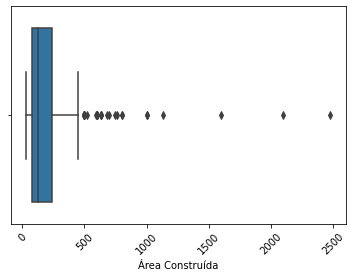

In [108]:
ax = sns.boxplot(x=df["area"])
ax.set(xlabel='Área Construída')

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation = 45)

plt.show()

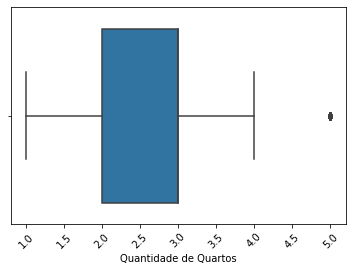

In [109]:
ax = sns.boxplot(x=df["qtde_quartos"])
ax.set(xlabel='Quantidade de Quartos')

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation = 45)

plt.show()

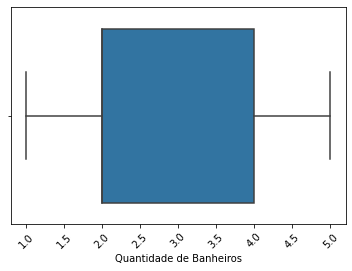

In [110]:
ax = sns.boxplot(x=df["qtde_banheiros"])
ax.set(xlabel='Quantidade de Banheiros')

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation = 45)

plt.show()

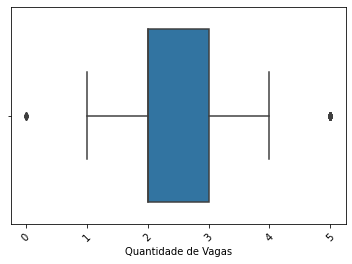

In [111]:
ax = sns.boxplot(x=df["qtde_vagas"])
ax.set(xlabel='Quantidade de Vagas')

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation = 45)

plt.show()

# ✴ Distribuição de Frequência

*Obs: A função para calcular a distribuição para variáveis contínuas com intervalo de classe retorna também intervalos que possuem 0 elementos. No entanto, nossas tabelas (somente no notebook), para fins de melhor entendimento, irão possuir alguns intervalos com amplitude maior pois consideramos somente intervalos com pelo menos um elemento.*

Não afeta os resultados muito menos a distribuição.

#### *Função para mostrar valores no topo do gráfico*

In [ ]:
def show_values(axs, space=0.6):
    def _single(ax):
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + space
                value = f'{p.get_height():.2f}%'
                ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

## ✧ Para variáveis qualitativas

### Zona (Nominal)

#### *Medidas Gerais*

In [ ]:
frequencia = df["zona"].value_counts()
percentual = round(df["zona"].value_counts(normalize=True) * 100, 2)
zonas = 'Oeste', 'Centro-Sul', 'Norte', 'Centro-Oeste', 'Sul', 'Leste'
frequencia

Oeste           128
Centro-Sul      122
Norte            73
Centro-Oeste     42
Sul              15
Leste            10
Name: zona, dtype: int64

In [ ]:
distribuicao_frequencia = pd.DataFrame({"Zona": zonas, "Frequencia": frequencia, "Percentual (%)": percentual})
distribuicao_frequencia.reset_index(inplace=True)
distribuicao_frequencia = distribuicao_frequencia.drop('index', axis=1)

distribuicao_frequencia

,Zona,Frequencia,Percentual (%)
0,Oeste,128,32.82
1,Centro-Sul,122,31.28
2,Norte,73,18.72
3,Centro-Oeste,42,10.77
4,Sul,15,3.85
5,Leste,10,2.56


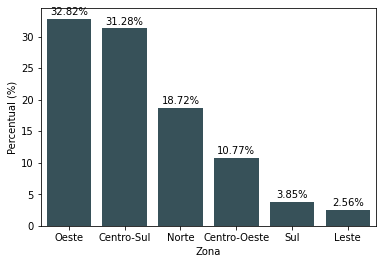

In [ ]:
ax = sns.barplot(data=distribuicao_frequencia, x="Zona", y="Percentual (%)", color="#32545e")
show_values(ax)

#### *Casas*

In [ ]:
frequencia = df_casas["zona"].value_counts()
percentual = round(df_casas["zona"].value_counts(normalize=True) * 100, 2)
frequencia

Oeste           78
Norte           62
Centro-Sul      58
Centro-Oeste    24
Sul             10
Leste            5
Name: zona, dtype: int64

In [ ]:
zonas = 'Oeste', 'Norte', 'Centro-Sul', 'Centro-Oeste', 'Sul', 'Leste'
distribuicao_frequencia = pd.DataFrame({"Zona": zonas, "Frequencia": frequencia, "Percentual (%)": percentual})
distribuicao_frequencia.reset_index(inplace=True)
distribuicao_frequencia = distribuicao_frequencia.drop('index', axis=1)

distribuicao_frequencia

,Zona,Frequencia,Percentual (%)
0,Oeste,78,32.91
1,Norte,62,26.16
2,Centro-Sul,58,24.47
3,Centro-Oeste,24,10.13
4,Sul,10,4.22
5,Leste,5,2.11


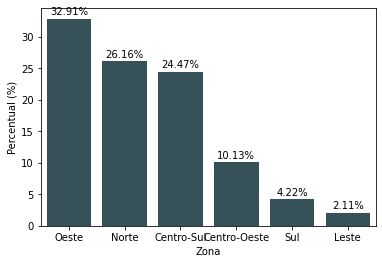

In [ ]:
ax = sns.barplot(data=distribuicao_frequencia, x="Zona", y="Percentual (%)", color= "#32545e")
show_values(ax)

#### *Apartamentos*

In [ ]:
frequencia = df_apartamentos["zona"].value_counts()
percentual = round(df_apartamentos["zona"].value_counts(normalize=True) * 100, 2)
frequencia

Centro-Sul      64
Oeste           50
Centro-Oeste    18
Norte           11
Leste            5
Sul              5
Name: zona, dtype: int64

In [ ]:
zonas = 'Centro-Sul', 'Oeste', 'Centro-Oeste', 'Norte', 'Leste', 'Sul'
distribuicao_frequencia = pd.DataFrame({"Zona": zonas, "Frequencia": frequencia, "Percentual (%)": percentual})
distribuicao_frequencia.reset_index(inplace=True)
distribuicao_frequencia = distribuicao_frequencia.drop('index', axis=1)

distribuicao_frequencia

,Zona,Frequencia,Percentual (%)
0,Centro-Sul,64,41.83
1,Oeste,50,32.68
2,Centro-Oeste,18,11.76
3,Norte,11,7.19
4,Leste,5,3.27
5,Sul,5,3.27


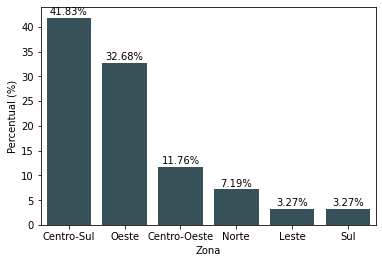

In [ ]:
ax = sns.barplot(data=distribuicao_frequencia, x="Zona", y="Percentual (%)", color= "#32545e")
show_values(ax)

### Categoria (Nominal)

In [ ]:
frequencia = df["categoria"].value_counts()
percentual = round(df["categoria"].value_counts(normalize=True) * 100, 2)
frequencia

Casas           237
Apartamentos    153
Name: categoria, dtype: int64

In [ ]:
categorias = 'Casas', 'Apartamentos'

distribuicao_frequencia = pd.DataFrame({"Categoria":categorias,"Frequencia": frequencia, "Percentual (%)": percentual})
distribuicao_frequencia.reset_index(inplace=True)
distribuicao_frequencia = distribuicao_frequencia.drop('index', axis=1)

distribuicao_frequencia

,Categoria,Frequencia,Percentual (%)
0,Casas,237,60.77
1,Apartamentos,153,39.23


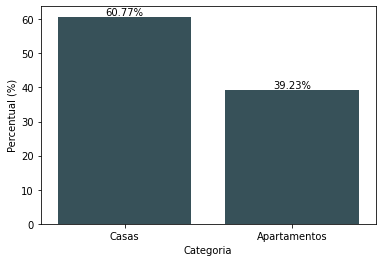

In [ ]:
ax = sns.barplot(data=distribuicao_frequencia, x="Categoria", y="Percentual (%)", color="#32545e")
show_values(ax)

## ✧ Para variáveis quantitativas

#### Função para Distribuição de Frequência de Variáveis Contínuas

In [ ]:
def n_classes(dados: pd.Series):
    n = len(dados)
    return round((1 + 3.322 * np.log10(n)))

def amplitude_classes(dados: pd.Series):
    amplitude = np.ceil((dados.max() - dados.min())/n_classes(dados))
    return amplitude

def construir_tabela(dados):
    dados_series = pd.Series(dados)
    n_class = n_classes(dados_series)
    amp_class = amplitude_classes(dados_series)
    bins = [dados_series.min() + i*amp_class for i in range(n_class+2)]
    return pd.cut(dados_series, bins=bins, right=False).value_counts(sort=False).rename('fi')

def dist_freq(dados):    
    df_dist_freq = pd.DataFrame(construir_tabela(dados))
    df_dist_freq.index = df_dist_freq.index.rename('Classes')

    total = df_dist_freq['fi'].sum()
    total_dist = pd.DataFrame({'fi':total}, index=['Total'])
    total_dist.index = total_dist.index.rename('Classes')
    df_dist_freq = pd.concat([df_dist_freq, total_dist])
    invalid_index = df_dist_freq[df_dist_freq["fi"] < 1].index
    df_dist_freq = df_dist_freq.drop(invalid_index)

    list_freq = np.asarray(df_dist_freq["fi"])
    list_per = [(round(list_freq[i]/total,4) * 100) for i in range(len(list_freq))]
    df_dist_freq.insert(loc=1, column="fr (%)", value=list_per)
    
        
    return  df_dist_freq

### Valor do Imóvel (Quantitativa Contínua)

#### Geral

In [ ]:
distribuicao_frequencia = dist_freq(df["valor"])
distribuicao_frequencia.reset_index(inplace=True)

In [ ]:
distribuicao_frequencia

,Classes,fi,fr (%)
0,"[40000.0, 786000.0)",271,69.49
1,"[786000.0, 1532000.0)",66,16.92
2,"[1532000.0, 2278000.0)",23,5.90
3,"[2278000.0, 3024000.0)",11,2.82
4,"[3024000.0, 3770000.0)",6,1.54
5,"[3770000.0, 4516000.0)",9,2.31
6,"[4516000.0, 5262000.0)",2,0.51
7,"[5262000.0, 6008000.0)",1,0.26
8,"[7500000.0, 8246000.0)",1,0.26
9,Total,390,100.00


#### Casas

In [ ]:
distribuicao_frequencia = dist_freq(df_casas["valor"])

In [ ]:
distribuicao_frequencia

,fi,fr (%)
Classes,,
"[45000.0, 873334.0)",167,70.46
"[873334.0, 1701668.0)",36,15.19
"[1701668.0, 2530002.0)",13,5.49
"[2530002.0, 3358336.0)",7,2.95
"[3358336.0, 4186670.0)",7,2.95
"[4186670.0, 5015004.0)",5,2.11
"[5015004.0, 5843338.0)",1,0.42
"[6671672.0, 7500006.0)",1,0.42
Total,237,100.00


#### Apartamentos

In [ ]:
distribuicao_frequencia = dist_freq(df_apartamentos["valor"])

In [ ]:
distribuicao_frequencia

,fi,fr (%)
Classes,,
"[40000.0, 647500.0)",102,66.67
"[647500.0, 1255000.0)",31,20.26
"[1255000.0, 1862500.0)",12,7.84
"[1862500.0, 2470000.0)",4,2.61
"[2470000.0, 3077500.0)",2,1.31
"[4292500.0, 4900000.0)",1,0.65
"[4900000.0, 5507500.0)",1,0.65
Total,153,100.00


### Área Construída (Quantitativa Contínua)

#### *Geral*

In [ ]:
distribuicao_frequencia = dist_freq(df["area"])

In [ ]:
distribuicao_frequencia

,fi,fr (%)
Classes,,
"[30.0, 275.0)",309,79.23
"[275.0, 520.0)",61,15.64
"[520.0, 765.0)",12,3.08
"[765.0, 1010.0)",4,1.03
"[1010.0, 1255.0)",1,0.26
"[1500.0, 1745.0)",1,0.26
"[1990.0, 2235.0)",1,0.26
"[2235.0, 2480.0)",1,0.26
Total,390,100.00


#### *Casas*

In [ ]:
distribuicao_frequencia = dist_freq(df_casas["area"])

In [ ]:
distribuicao_frequencia

,fi,fr (%)
Classes,,
"[30.0, 302.0)",175,73.84
"[302.0, 574.0)",43,18.14
"[574.0, 846.0)",13,5.49
"[846.0, 1118.0)",2,0.84
"[1118.0, 1390.0)",1,0.42
"[1390.0, 1662.0)",1,0.42
"[1934.0, 2206.0)",1,0.42
"[2478.0, 2750.0)",1,0.42
Total,237,100.00


#### *Apartamentos*

In [ ]:
distribuicao_frequencia = dist_freq(df_apartamentos["area"])

In [ ]:
distribuicao_frequencia

,fi,fr (%)
Classes,,
"[32.0, 91.0)",87,56.86
"[91.0, 150.0)",38,24.84
"[150.0, 209.0)",17,11.11
"[209.0, 268.0)",5,3.27
"[268.0, 327.0)",3,1.96
"[327.0, 386.0)",1,0.65
"[386.0, 445.0)",1,0.65
"[445.0, 504.0)",1,0.65
Total,153,100.00


### Quantidade de Quartos (Quantitativa Discreta)

#### Geral

In [ ]:
frequencia = df["qtde_quartos"].value_counts()
percentual = round(df["qtde_quartos"].value_counts(normalize=True) * 100, 2)

In [ ]:
distribuicao_frequencia = pd.DataFrame({"Frequencia": frequencia, "Percentual (%)": percentual})
distribuicao_frequencia.reset_index(inplace=True)
distribuicao_frequencia.rename(columns={"index":"Qtde. Quartos"}, inplace=True)

#### *Geral: Resultados*

In [ ]:
distribuicao_frequencia

,Qtde. Quartos,Frequencia,Percentual (%)
0,3,194,49.74
1,2,99,25.38
2,4,58,14.87
3,5,30,7.69
4,1,9,2.31


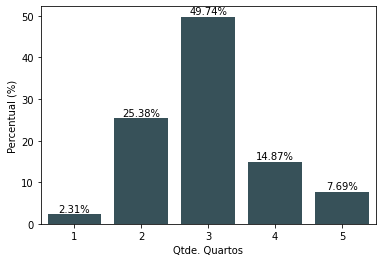

In [ ]:
plot = sns.barplot(data=distribuicao_frequencia, x="Qtde. Quartos", y="Percentual (%)", color= "#32545e")
show_values(plot)

#### Casas

In [ ]:
frequencia = df_casas["qtde_quartos"].value_counts()
percentual = round(df_casas["qtde_quartos"].value_counts(normalize=True) * 100, 2)

In [ ]:
distribuicao_frequencia = pd.DataFrame({"Frequencia": frequencia, "Percentual (%)": percentual})
distribuicao_frequencia.reset_index(inplace=True)
distribuicao_frequencia.rename(columns={"index":"Qtde. Quartos"}, inplace=True)

#### *Casas: Resultados*

In [ ]:
distribuicao_frequencia

,Qtde. Quartos,Frequencia,Percentual (%)
0,3,115,48.52
1,2,50,21.10
2,4,41,17.30
3,5,28,11.81
4,1,3,1.27


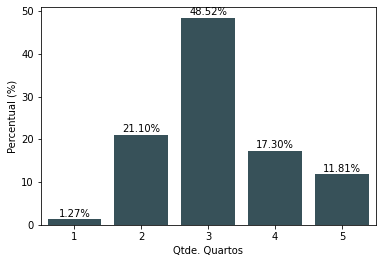

In [ ]:
plot = sns.barplot(data=distribuicao_frequencia, x="Qtde. Quartos", y="Percentual (%)", color= "#32545e")

show_values(plot)

#### Apartamentos

In [ ]:
frequencia = df_apartamentos["qtde_quartos"].value_counts()
percentual = round(df_apartamentos["qtde_quartos"].value_counts(normalize=True) * 100, 2)

In [ ]:
distribuicao_frequencia = pd.DataFrame({"Frequencia": frequencia, "Percentual (%)": percentual})
distribuicao_frequencia.reset_index(inplace=True)
distribuicao_frequencia.rename(columns={"index":"Qtde. Quartos"}, inplace=True)

#### *Apartamentos: Resultado*

In [ ]:
distribuicao_frequencia

,Qtde. Quartos,Frequencia,Percentual (%)
0,3,79,51.63
1,2,49,32.03
2,4,17,11.11
3,1,6,3.92
4,5,2,1.31


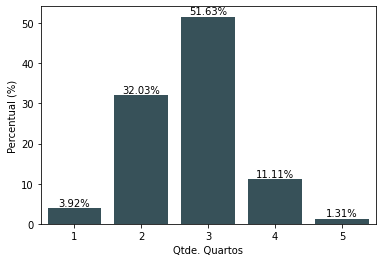

In [ ]:
plot = sns.barplot(data=distribuicao_frequencia, x="Qtde. Quartos", y="Percentual (%)", color= "#32545e")
show_values(plot)

### Quantidade de Banheiros (Quantitativa Discreta)

#### Geral

In [ ]:
frequencia = df["qtde_banheiros"].value_counts()
percentual = round(df["qtde_banheiros"].value_counts(normalize=True) * 100, 2)

In [ ]:
distribuicao_frequencia = pd.DataFrame({"Frequencia": frequencia, "Percentual (%)": percentual})
distribuicao_frequencia.reset_index(inplace=True)
distribuicao_frequencia.rename(columns={"index":"Qtde. Banheiros"}, inplace=True)

#### *Geral: Resultados*

In [ ]:
distribuicao_frequencia

,Qtde. Banheiros,Frequencia,Percentual (%)
0,2,126,32.31
1,1,83,21.28
2,5,70,17.95
3,4,57,14.62
4,3,54,13.85


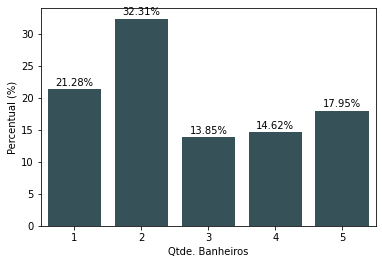

In [ ]:
plot = sns.barplot(data=distribuicao_frequencia, x="Qtde. Banheiros", y="Percentual (%)", color= "#32545e")
show_values(plot)

#### Casas

In [ ]:
frequencia = df_casas["qtde_banheiros"].value_counts()
percentual = round(df_casas["qtde_banheiros"].value_counts(normalize=True) * 100, 2)

In [ ]:
distribuicao_frequencia = pd.DataFrame({"Frequencia": frequencia, "Percentual (%)": percentual})
distribuicao_frequencia.reset_index(inplace=True)
distribuicao_frequencia.rename(columns={"index":"Qtde. Banheiros"}, inplace=True)

#### *Casas: Resultados*

In [ ]:
distribuicao_frequencia

,Qtde. Banheiros,Frequencia,Percentual (%)
0,2,77,32.49
1,5,57,24.05
2,1,38,16.03
3,3,33,13.92
4,4,32,13.50


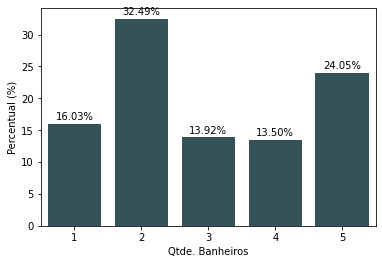

In [ ]:
plot = sns.barplot(data=distribuicao_frequencia, x="Qtde. Banheiros", y="Percentual (%)", color= "#32545e")

show_values(plot)

#### Apartamentos

In [ ]:
frequencia = df_apartamentos["qtde_banheiros"].value_counts()
percentual = round(df_apartamentos["qtde_banheiros"].value_counts(normalize=True) * 100, 2)

In [ ]:
distribuicao_frequencia = pd.DataFrame({"Frequencia": frequencia, "Percentual (%)": percentual})
distribuicao_frequencia.reset_index(inplace=True)
distribuicao_frequencia.rename(columns={"index":"Qtde. Banheiros"}, inplace=True)

#### *Apartamentos: Resultado*

In [ ]:
distribuicao_frequencia

,Qtde. Banheiros,Frequencia,Percentual (%)
0,2,49,32.03
1,1,45,29.41
2,4,25,16.34
3,3,21,13.73
4,5,13,8.50


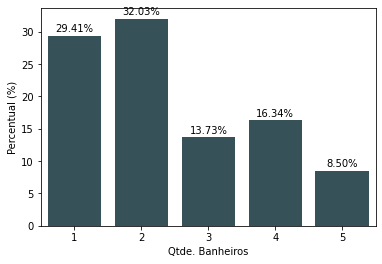

In [ ]:
plot = sns.barplot(data=distribuicao_frequencia, x="Qtde. Banheiros", y="Percentual (%)", color= "#32545e")
show_values(plot)

### Quantidade de Vagas de Garagem (Quantitativa Discreta)

#### Geral

In [ ]:
frequencia = df["qtde_vagas"].value_counts()
percentual = round(df["qtde_vagas"].value_counts(normalize=True) * 100, 2)

In [ ]:
distribuicao_frequencia = pd.DataFrame({"Frequencia": frequencia, "Percentual (%)": percentual})
distribuicao_frequencia.reset_index(inplace=True)
distribuicao_frequencia.rename(columns={"index":"Qtde. Vagas"}, inplace=True)

#### *Geral: Resultados*

In [ ]:
distribuicao_frequencia

,Qtde. Vagas,Frequencia,Percentual (%)
0,2,145,37.18
1,1,88,22.56
2,4,66,16.92
3,3,55,14.10
4,5,31,7.95
5,0,5,1.28


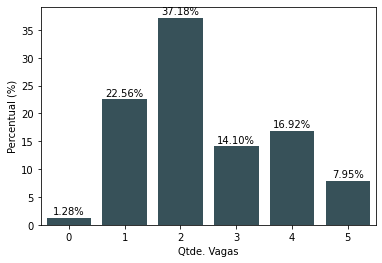

In [ ]:
plot = sns.barplot(data=distribuicao_frequencia, x="Qtde. Vagas", y="Percentual (%)", color= "#32545e")
show_values(plot)

#### Casas

In [ ]:
frequencia = df_casas["qtde_vagas"].value_counts()
percentual = round(df_casas["qtde_vagas"].value_counts(normalize=True) * 100, 2)

In [ ]:
distribuicao_frequencia = pd.DataFrame({"Frequencia": frequencia, "Percentual (%)": percentual})
distribuicao_frequencia.reset_index(inplace=True)
distribuicao_frequencia.rename(columns={"index":"Qtde. Vagas"}, inplace=True)

#### *Casas: Resultados*

In [ ]:
distribuicao_frequencia

,Qtde. Vagas,Frequencia,Percentual (%)
0,2,87,36.71
1,4,59,24.89
2,3,40,16.88
3,5,26,10.97
4,1,22,9.28
5,0,3,1.27


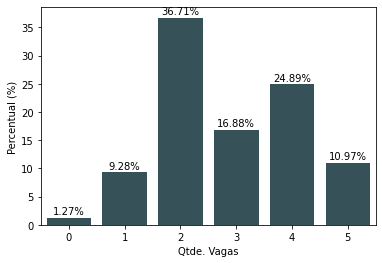

In [ ]:
plot = sns.barplot(data=distribuicao_frequencia, x="Qtde. Vagas", y="Percentual (%)", color= "#32545e")

show_values(plot)

#### Apartamentos

In [ ]:
frequencia = df_apartamentos["qtde_vagas"].value_counts()
percentual = round(df_apartamentos["qtde_vagas"].value_counts(normalize=True) * 100, 2)

In [ ]:
distribuicao_frequencia = pd.DataFrame({"Frequencia": frequencia, "Percentual (%)": percentual})
distribuicao_frequencia.reset_index(inplace=True)
distribuicao_frequencia.rename(columns={"index":"Qtde. Vagas"}, inplace=True)

#### *Apartamentos: Resultado*

In [ ]:
distribuicao_frequencia

,Qtde. Vagas,Frequencia,Percentual (%)
0,1,66,43.14
1,2,58,37.91
2,3,15,9.80
3,4,7,4.58
4,5,5,3.27
5,0,2,1.31


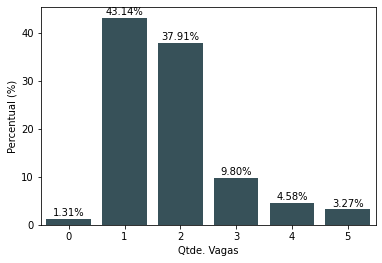

In [ ]:
plot = sns.barplot(data=distribuicao_frequencia, x="Qtde. Vagas", y="Percentual (%)", color= "#32545e")
show_values(plot)